# Diabetes analysis
Data analysis based on diabetes.csv downloaded from Kaggle. <br>
Data source: https://www.kaggle.com/uciml/pima-indians-diabetes-database


Diabetes is a metabolic disorder characterising in high glucose level in blood. It results from wrong insulin production or its wrong metabolism in cells. 

The goal of this analysis is to create a model which would predict if the person has diabetes or not based on some blood and person's parameters.

# Import and prepare the data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('FILES/diabetes.csv', sep=',')
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
47,2,71,70,27,0,28.0,0.586,22,0
13,1,189,60,23,846,30.1,0.398,59,1
581,6,109,60,27,0,25.0,0.206,27,0
598,1,173,74,0,0,36.8,0.088,38,1
485,0,135,68,42,250,42.3,0.365,24,1
698,4,127,88,11,155,34.5,0.598,28,0
582,12,121,78,17,0,26.5,0.259,62,0
679,2,101,58,17,265,24.2,0.614,23,0
8,2,197,70,45,543,30.5,0.158,53,1
635,13,104,72,0,0,31.2,0.465,38,1


The code above simply reads the .csv file and stores the data in data variable. Now let's take a look on the data and count NaNs or 0 values.

In [2]:
# describing the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
# checking information about the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# checking null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# checking how many of each columns are 0's
for c in data.columns:
    print(c + ': ' + str(data[data[c] == 0][c].count()))

Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


There can be women with no pregnancies, but data for Glucose, BloodPressure, SkinThickness, Insulin and BMI is incomplete.<br>Now let's see how many patients did have diabetes.

In [6]:
# outcome count:
data['Outcome'].value_counts(normalize=True) * 100

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

OK, so now we know that 65% of dataset did not have diabetes against 35% who had. I assume that people who had diabetes have different values of parameters than people who did not have it. That is why I change 0's with median for corresponding value.

In [7]:
# changing 0's to NaN so that they do not change the median value
for c in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[c].replace(0, np.NaN, inplace=True)

In [8]:
# check if correct number of cells has been changed
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
# how it looks in dataframe
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
466,0,74.0,52.0,10.0,36.0,27.8,0.269,22,0
29,5,117.0,92.0,NaN,NaN,34.1,0.337,38,0
341,1,95.0,74.0,21.0,73.0,25.9,0.673,36,0
240,1,91.0,64.0,24.0,NaN,29.2,0.192,21,0
308,0,128.0,68.0,19.0,180.0,30.5,1.391,25,1
302,5,77.0,82.0,41.0,42.0,35.8,0.156,35,0
347,3,116.0,NaN,NaN,NaN,23.5,0.187,23,0
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
15,7,100.0,NaN,NaN,NaN,30.0,0.484,32,1
95,6,144.0,72.0,27.0,228.0,33.9,0.255,40,0


In [10]:
# print actual medians grouped by outcome
data.groupby('Outcome').median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.0,107.0,70.0,27.0,102.5,30.1,0.336,27.0
1,4.0,140.0,74.5,32.0,169.5,34.3,0.449,36.0


In [11]:
# change NaN's to corresponding median
for c in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data.loc[(data['Outcome'] == 0) & (data[c].isnull()), c] = data[data['Outcome'] == 0][c].median() 
    data.loc[(data['Outcome'] == 1) & (data[c].isnull()), c] = data[data['Outcome'] == 1][c].median() 
data.isnull().sum()             

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# print actual medians grouped by outcome
data.groupby('Outcome').median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.0,107.0,70.0,27.0,102.5,30.1,0.336,27.0
1,4.0,140.0,74.5,32.0,169.5,34.3,0.449,36.0


# Data visualisation

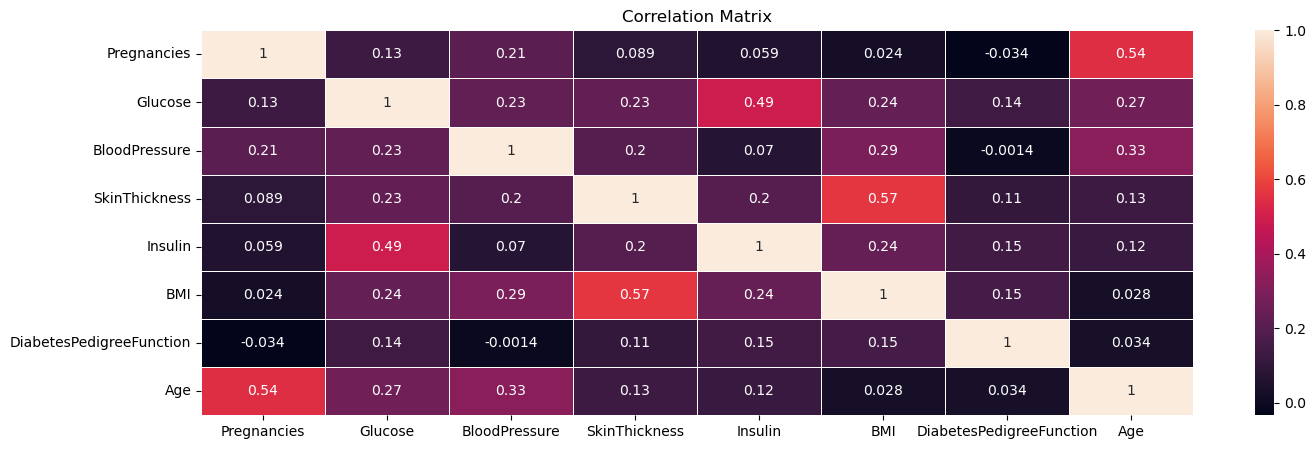

In [14]:
corrMatrix = data.iloc[:,0:8].corr()
plt.figure(figsize = (16,5))
sns.heatmap(corrMatrix, annot=True, linewidth=.5)
plt.title('Correlation Matrix')
plt.show()

From correlation matrix we see that there is a high correlation between Age and Pregnancies (0.54), Insulin and Glucose (0.49) as well as BMI and SkinThickness (0.57). Let's see how these parameters look on a scatter plot.

In [35]:
# prepare data also for next plotting area
xlims, ylims = [(10, 90), (40, 220), (0, 100)], [(0, 20), (0, 900), (10, 70)]
xvals, yvals = ['Age', 'Glucose', 'SkinThickness'], ['Pregnancies', 'Insulin', 'BMI']

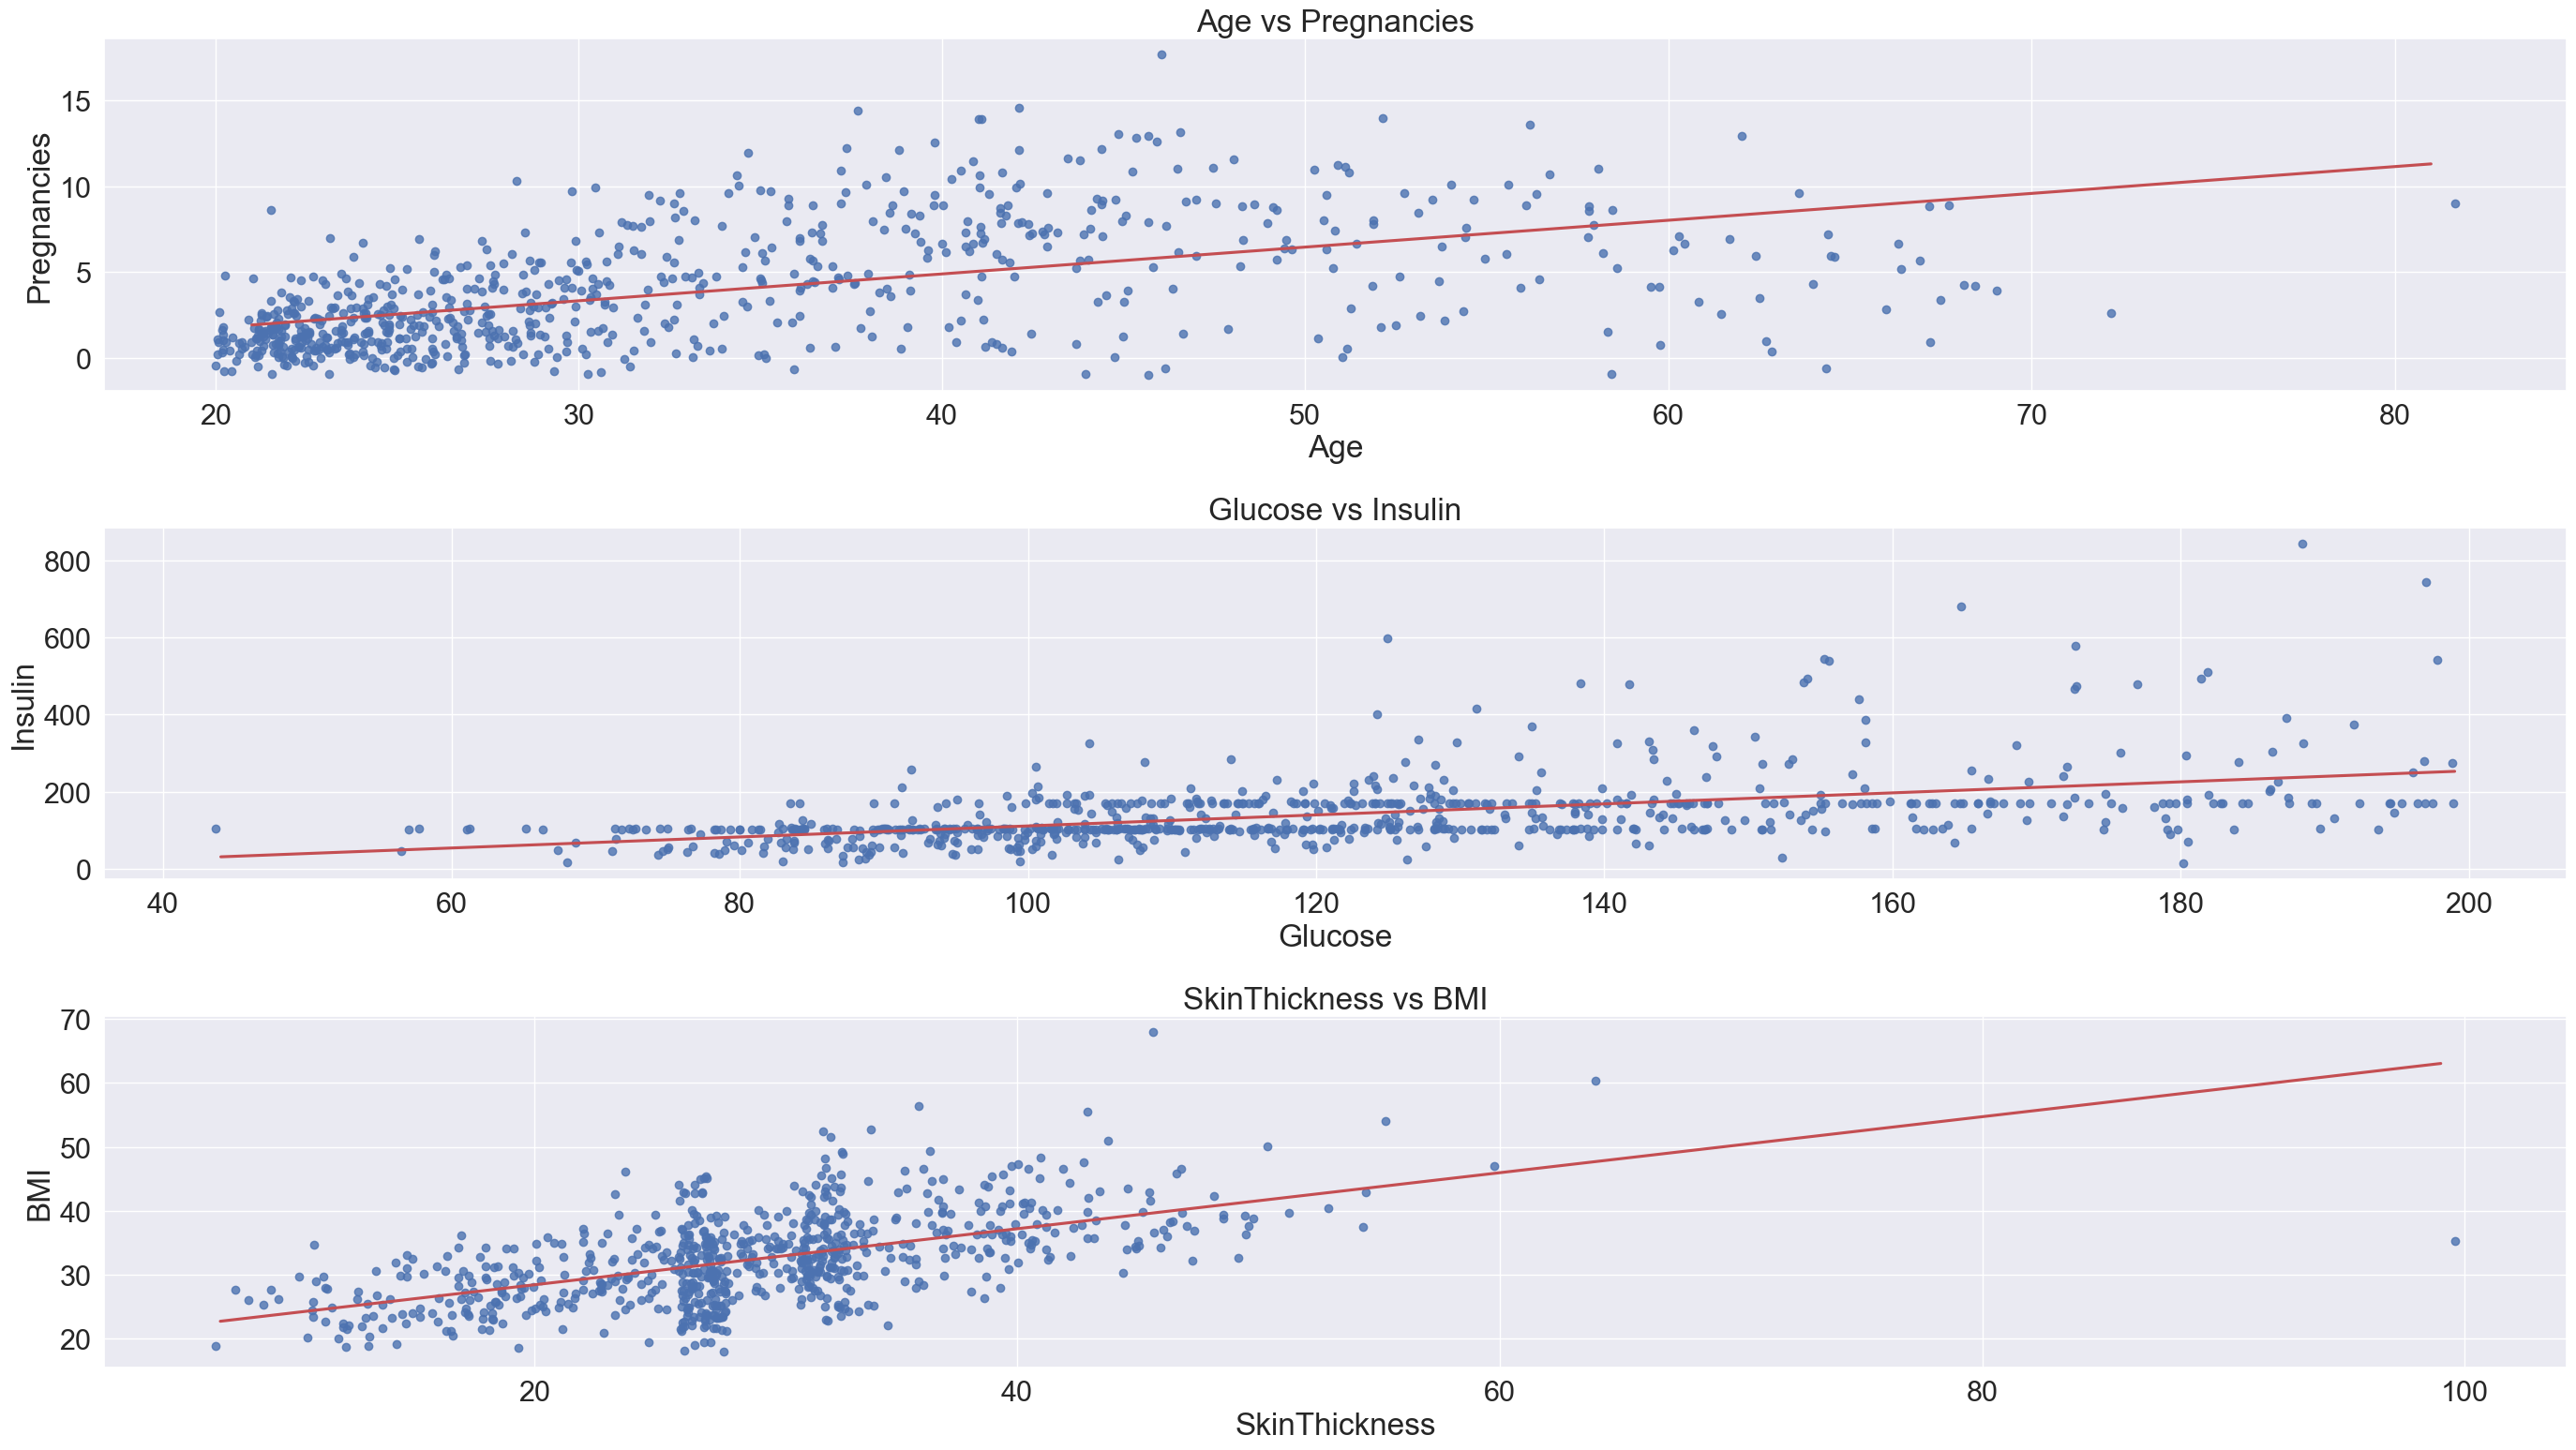

In [36]:
# prepare visualization
sns.set(style='darkgrid', font_scale=2)

fig, axes = plt.subplots(3, figsize=(28,16))
for ax, xval, yval, xlim, ylim in zip(axes, xvals, yvals, xlims, ylims):
    sns.regplot(data=data, x=xval, y=yval, ax=ax, x_jitter=True, y_jitter=True, ci=None, line_kws={'color': 'r'})
    ax.set_title(''.join([xval, ' vs ', yval])) 

fig.tight_layout() 
plt.show()

Maybe it will be good to see the scatter plots for each outcome separately. 

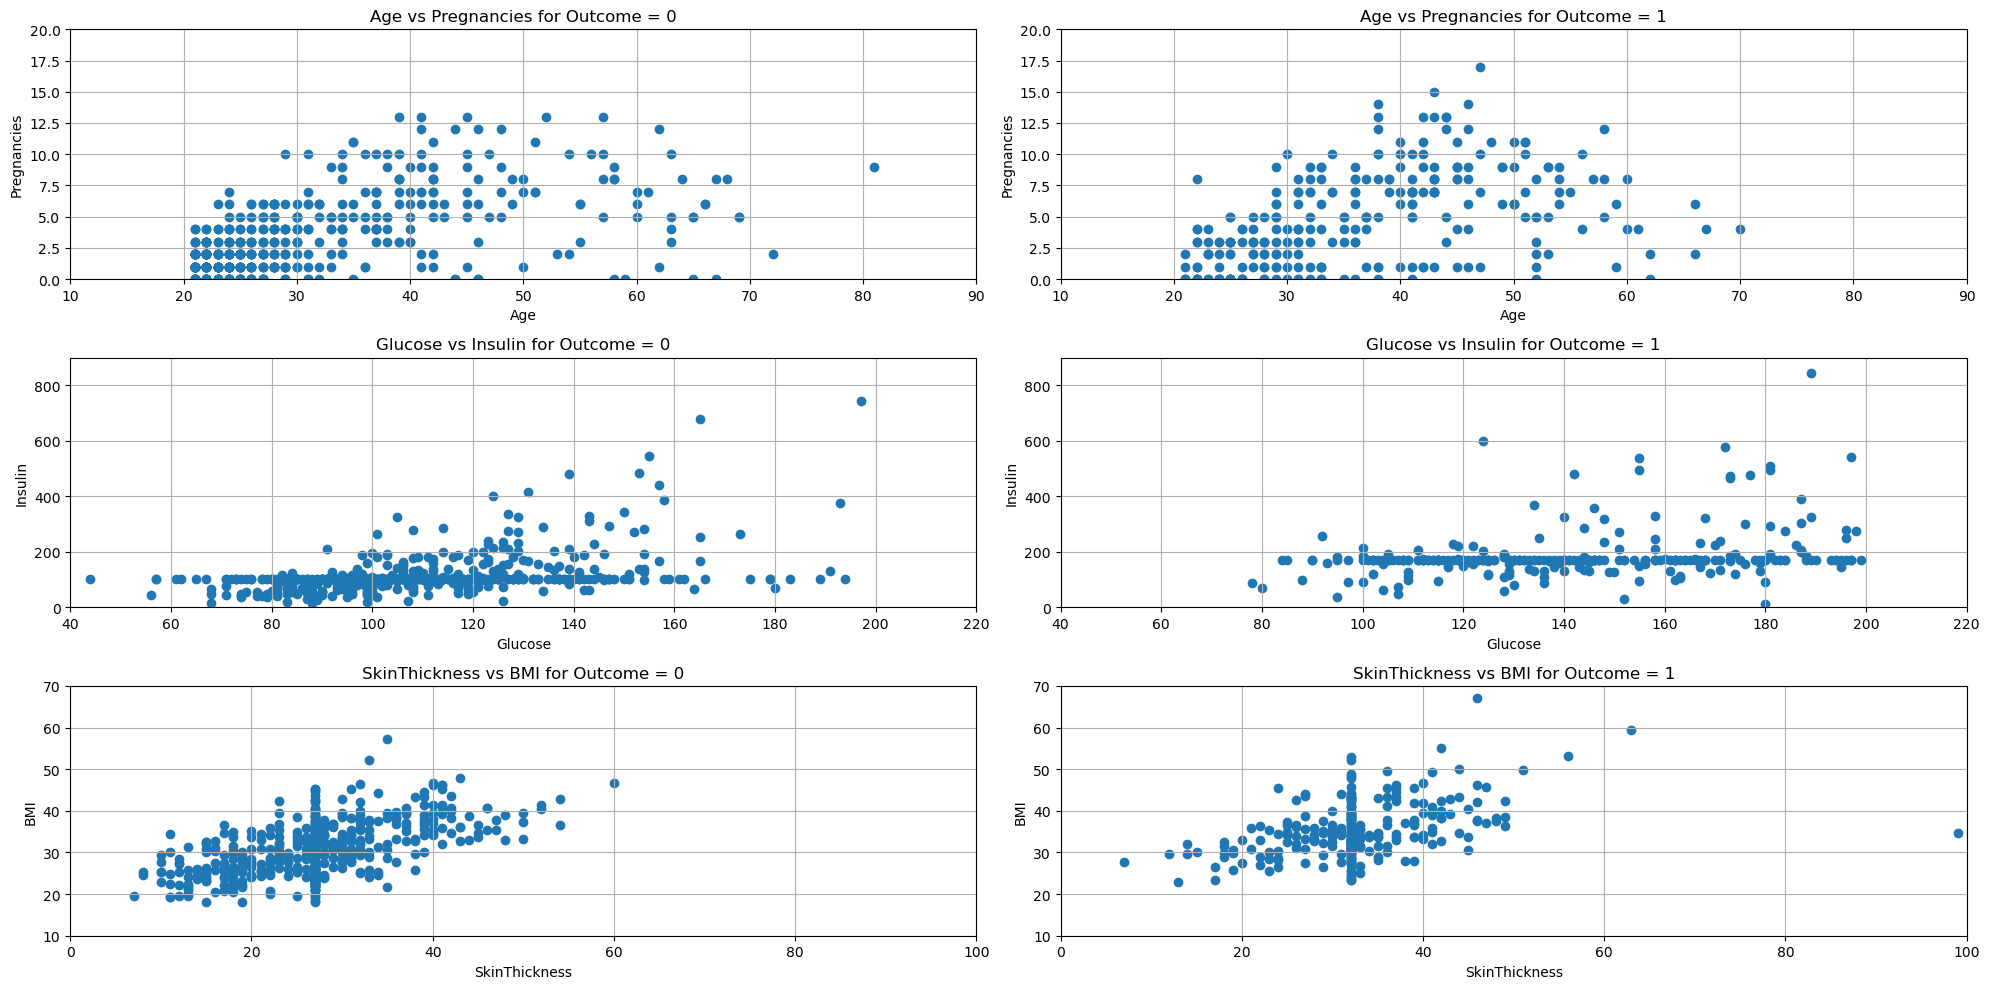

In [21]:
plt.figure(figsize=(20,10))
for num, xval, yval, xlims, ylims in zip([321, 323, 325], ['Age', 'Glucose', 'SkinThickness'], 
                                         ['Pregnancies', 'Insulin', 'BMI'], [(10, 90), (40, 220), (0, 100)], [(0, 20), (0, 900), (10, 70)]):
    for outcome in [0, 1]:
        plt.subplot(num + outcome) 
        plt.scatter(x=data[data['Outcome'] == outcome][xval], y=data[data['Outcome'] == outcome][yval])
        plt.grid(True)
        plt.xlabel(xval)
        plt.xlim(*xlims)
        plt.ylim(*ylims)
        plt.ylabel(yval)
        plt.title(''.join([xval, ' vs ', yval, ' for Outcome = ', str(outcome)]))

plt.tight_layout() 
plt.show()

We can see also histograms for each parameter but separately for Outcome = 1 and Outcome = 0.

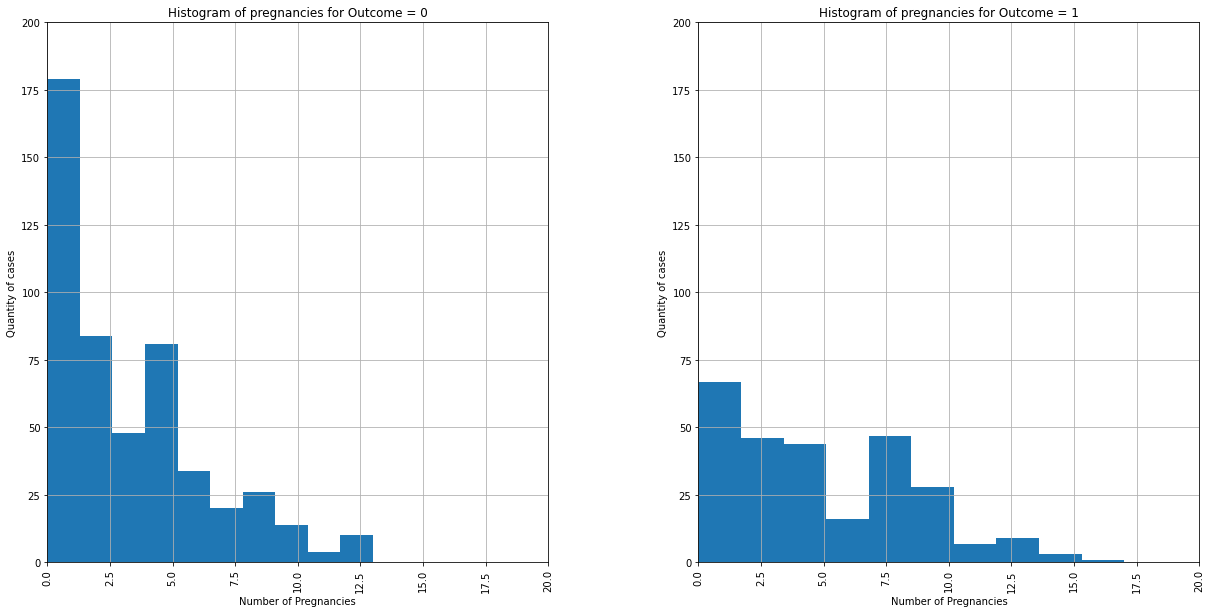

In [17]:
# histogram for pregnancies
# different histograms for Outcome = 1 and Outcome = 0

hist_preg = data.hist(column='Pregnancies', by='Outcome', bins=10, xlabelsize=None, figsize=(20,10));
hist_preg[0].grid(True)
hist_preg[0].set_xlim(0,20)
hist_preg[0].set_ylim(0,200)
hist_preg[0].set_xlabel('Number of Pregnancies')
hist_preg[0].set_ylabel('Quantity of cases')
hist_preg[0].set_title('Histogram of pregnancies for Outcome = 0')

hist_preg[1].grid(True)
hist_preg[1].set_xlim(0,20)
hist_preg[1].set_ylim(0,200)
hist_preg[1].set_xlabel('Number of Pregnancies')
hist_preg[1].set_ylabel('Quantity of cases')
hist_preg[1].set_title('Histogram of pregnancies for Outcome = 1');


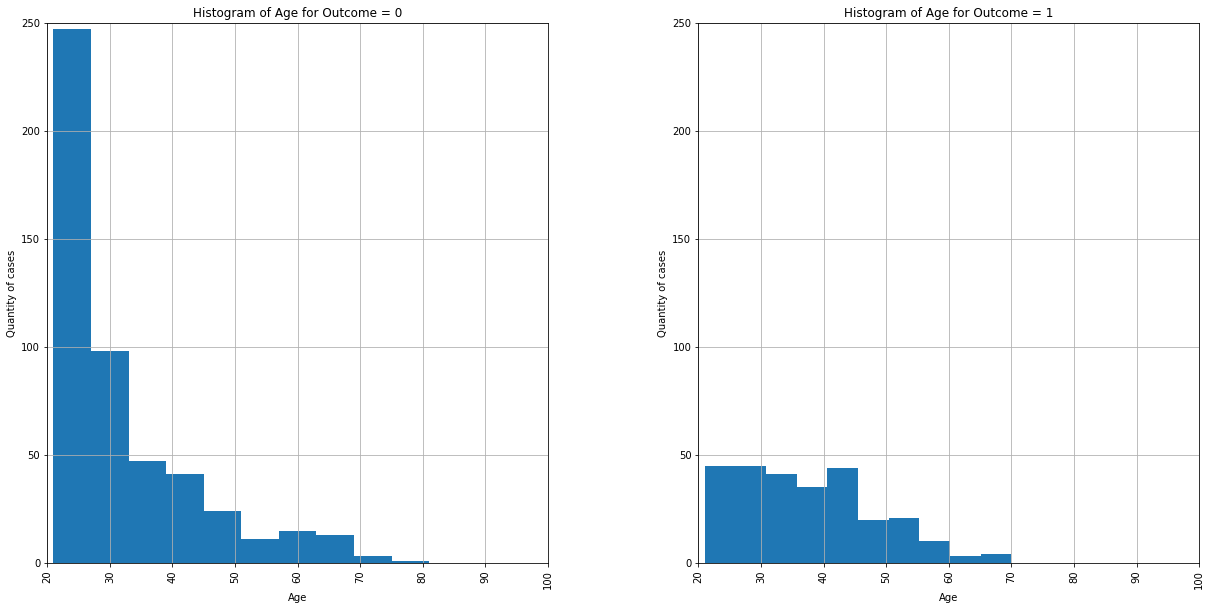

In [18]:
# histogram for Age
# different histograms for Outcome = 1 and Outcome = 0

hist_age = data.hist(column='Age', by='Outcome', bins=10, figsize=(20,10))
hist_age[0].grid(True)
hist_age[0].set_xlim(20,100)
hist_age[0].set_ylim(0,250)
hist_age[0].set_xlabel('Age')
hist_age[0].set_ylabel('Quantity of cases')
hist_age[0].set_title('Histogram of Age for Outcome = 0')

hist_age[1].grid(True)
hist_age[1].set_xlim(20,100)
hist_age[1].set_ylim(0,250)
hist_age[1].set_xlabel('Age')
hist_age[1].set_ylabel('Quantity of cases')
hist_age[1].set_title('Histogram of Age for Outcome = 1');

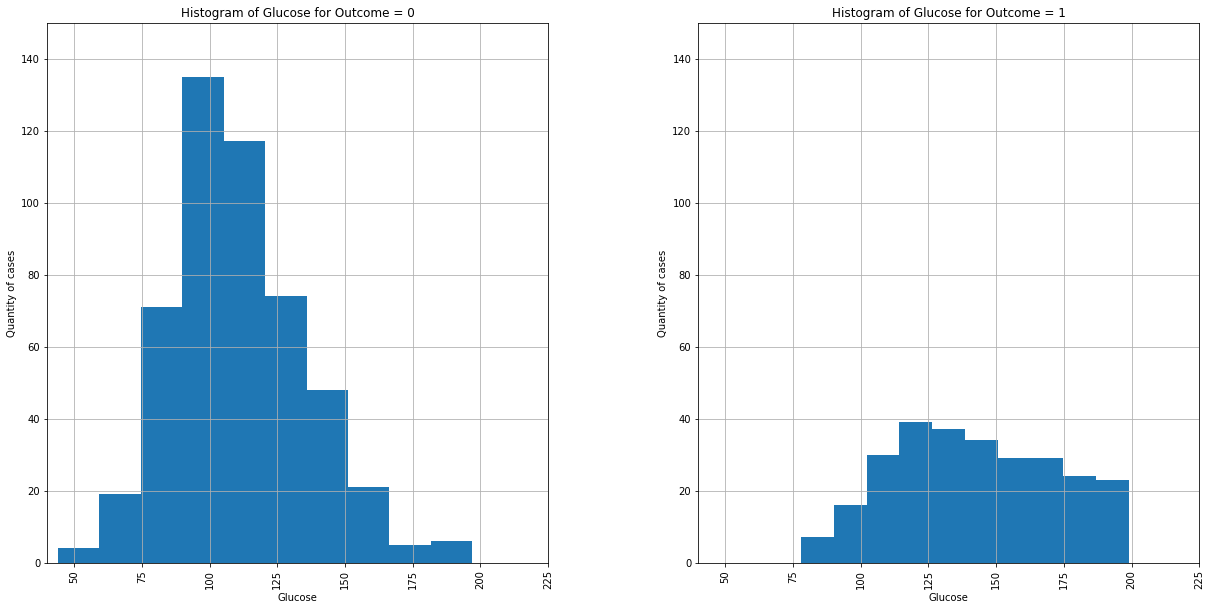

In [19]:
# histogram for Glucose
# different histograms for Outcome = 1 and Outcome = 0
hist_glucose = data.hist(column='Glucose', by='Outcome', bins=10, figsize=(20,10))
hist_glucose[0].grid(True)
hist_glucose[0].set_xlim(40,225)
hist_glucose[0].set_ylim(0,150)
hist_glucose[0].set_xlabel('Glucose')
hist_glucose[0].set_ylabel('Quantity of cases')
hist_glucose[0].set_title('Histogram of Glucose for Outcome = 0')

hist_glucose[1].grid(True)
hist_glucose[1].set_xlim(40,225)
hist_glucose[1].set_ylim(0,150)
hist_glucose[1].set_xlabel('Glucose')
hist_glucose[1].set_ylabel('Quantity of cases')
hist_glucose[1].set_title('Histogram of Glucose for Outcome = 1');

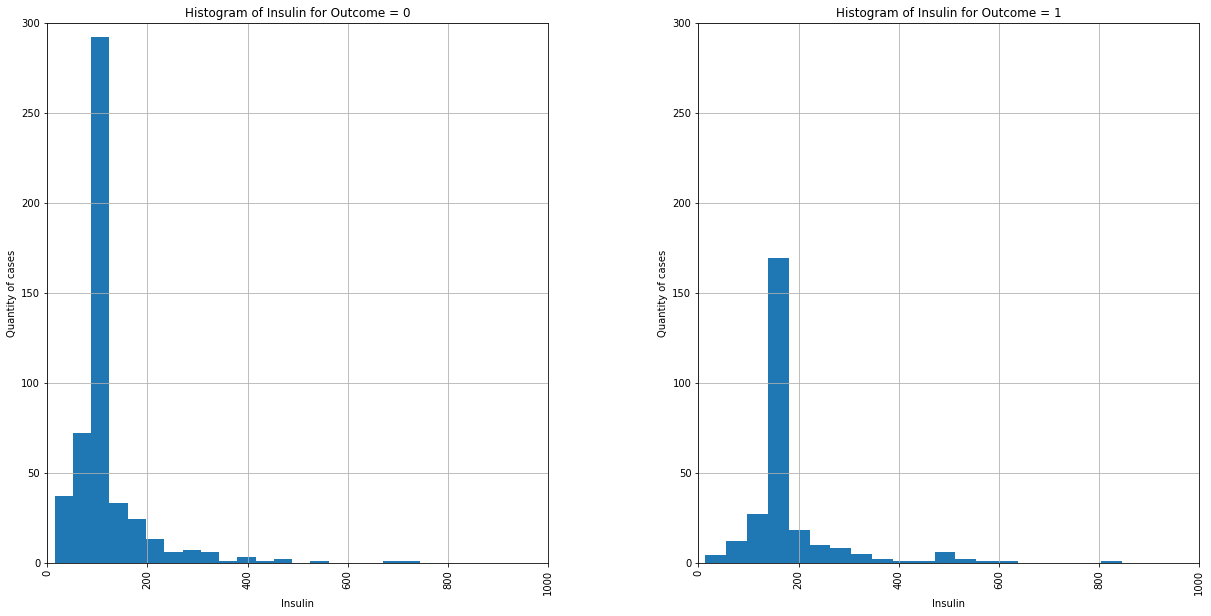

In [20]:
# histogram for Insulin
# different histograms for Outcome = 1 and Outcome = 0
hist_insulin = data.hist(column='Insulin', by='Outcome', bins=20, figsize=(20,10))

hist_insulin[0].grid(True)
hist_insulin[0].set_xlim(0,1000)
hist_insulin[0].set_ylim(0,300)
hist_insulin[0].set_xlabel('Insulin')
hist_insulin[0].set_ylabel('Quantity of cases')
hist_insulin[0].set_title('Histogram of Insulin for Outcome = 0')

hist_insulin[1].grid(True)
hist_insulin[1].set_xlim(0,1000)
hist_insulin[1].set_ylim(0,300)
hist_insulin[1].set_xlabel('Insulin')
hist_insulin[1].set_ylabel('Quantity of cases')
hist_insulin[1].set_title('Histogram of Insulin for Outcome = 1');

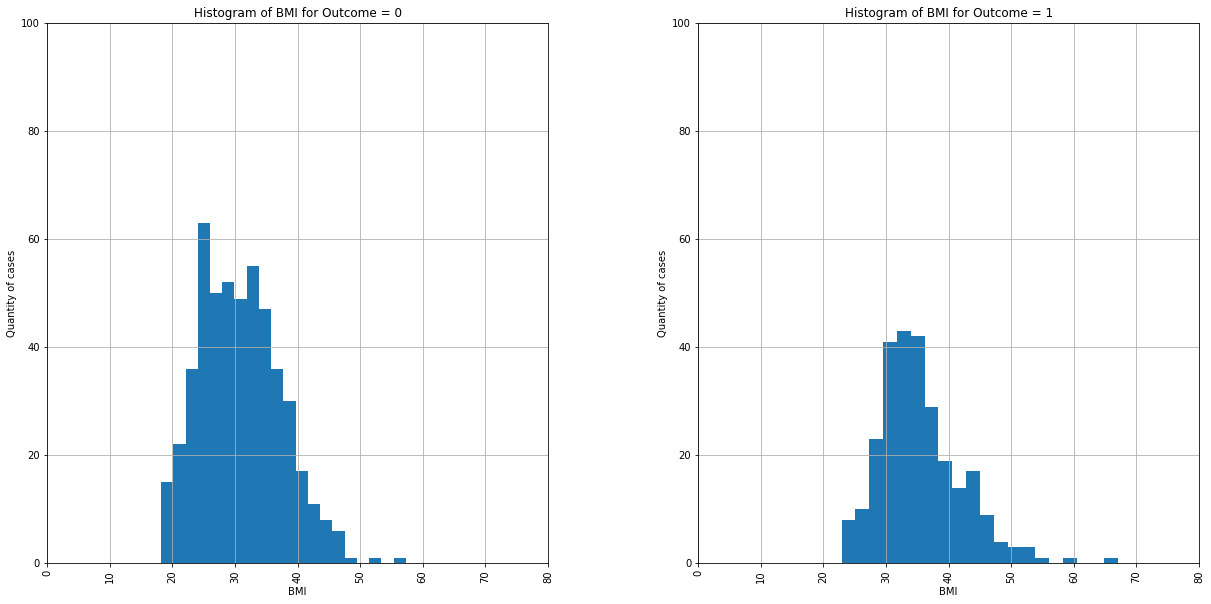

In [21]:
# histogram for BMI
# different histograms for Outcome = 1 and Outcome = 0
hist_BMI = data.hist(column='BMI', by='Outcome', bins=20, figsize=(20,10))

hist_BMI[0].grid(True)
hist_BMI[0].set_xlim(0,80)
hist_BMI[0].set_ylim(0,100)
hist_BMI[0].set_xlabel('BMI')
hist_BMI[0].set_ylabel('Quantity of cases')
hist_BMI[0].set_title('Histogram of BMI for Outcome = 0')

hist_BMI[1].grid(True)
hist_BMI[1].set_xlim(0,80)
hist_BMI[1].set_ylim(0,100)
hist_BMI[1].set_xlabel('BMI')
hist_BMI[1].set_ylabel('Quantity of cases')
hist_BMI[1].set_title('Histogram of BMI for Outcome = 1');

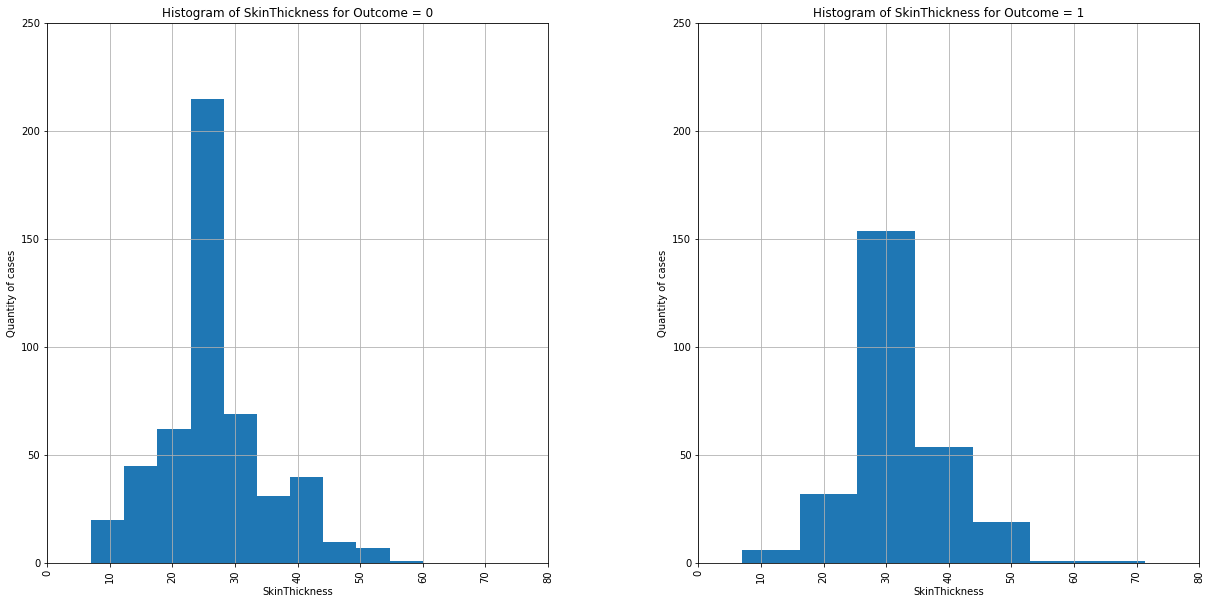

In [22]:
# histogram for SkinThickness
# there should be different histograms for Outcome = 1 and Outcome = 0
hist_SkinThickness = data.hist(column='SkinThickness', by='Outcome', bins=10, figsize=(20,10))

hist_SkinThickness[0].grid(True)
hist_SkinThickness[0].set_xlim(0,80)
hist_SkinThickness[0].set_ylim(0,250)
hist_SkinThickness[0].set_xlabel('SkinThickness')
hist_SkinThickness[0].set_ylabel('Quantity of cases')
hist_SkinThickness[0].set_title('Histogram of SkinThickness for Outcome = 0')

hist_SkinThickness[1].grid(True)
hist_SkinThickness[1].set_xlim(0,80)
hist_SkinThickness[1].set_ylim(0,250)
hist_SkinThickness[1].set_xlabel('SkinThickness')
hist_SkinThickness[1].set_ylabel('Quantity of cases')
hist_SkinThickness[1].set_title('Histogram of SkinThickness for Outcome = 1');

Remember that we have inserted median of parameters for according output so it can disturb the histogram. Nevertheless histogram for outcome = 1 is always more to the right than for outcome = 0.

# Creating a model

Now I will try to create test and train data to train classification model and test its accuracy. So the next steps are:
* normalize the data
* create train and test data
* try to make a classification 
* test it and check the accuracy of the model

In [23]:
# import needed libraries form sklearn

# preprocessing to normalize the data
from sklearn import preprocessing

# test_train_split
from sklearn.model_selection import train_test_split

# K-neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# metrics to check how accurate is the model
from sklearn import metrics

## Normalize the data

In [24]:
# normalize the data
X = data[['Pregnancies', 'Glucose', 
          'BloodPressure', 'SkinThickness', 
          'Insulin', 'BMI', 
          'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

## Divide the data in parts for training and testing 

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (537, 8) (537,)
Test set: (231, 8) (231,)


## First training for the model

In [44]:
k = 4
# Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
print(yhat)

[1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0
 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0]


## Accuracy for the first model (k = 4)

In [45]:
print("Train set Accuracy: " + str(round(100 * metrics.accuracy_score(y_train, neigh.predict(X_train)), 2)) + "%")
print("Test set Accuracy:  " + str(round(100 * metrics.accuracy_score(y_test, yhat), 2)) + "%")

Train set Accuracy: 86.22%
Test set Accuracy:  81.39%


## Testing accuracy for different k

In [46]:
Ks = 30
mean_acc = np.zeros(Ks - 1)
std_acc = np.zeros(Ks - 1)

for n in range(1,Ks):
    # Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = round(100 * metrics.accuracy_score(y_test, yhat), 2)
    std_acc[n-1] = round(100 * np.std(yhat==y_test)/np.sqrt(yhat.shape[0]), 2)

print(mean_acc)
print(std_acc)

[75.32 78.35 79.65 81.39 81.82 83.98 83.12 82.68 83.12 83.12 82.25 83.98
 83.12 84.85 83.12 85.28 84.85 85.71 84.85 84.85 82.68 82.68 82.68 82.68
 82.68 82.68 82.25 82.68 82.25]
[2.84 2.71 2.65 2.56 2.54 2.41 2.46 2.49 2.46 2.46 2.51 2.41 2.46 2.36
 2.46 2.33 2.36 2.3  2.36 2.36 2.49 2.49 2.49 2.49 2.49 2.49 2.51 2.49
 2.51]


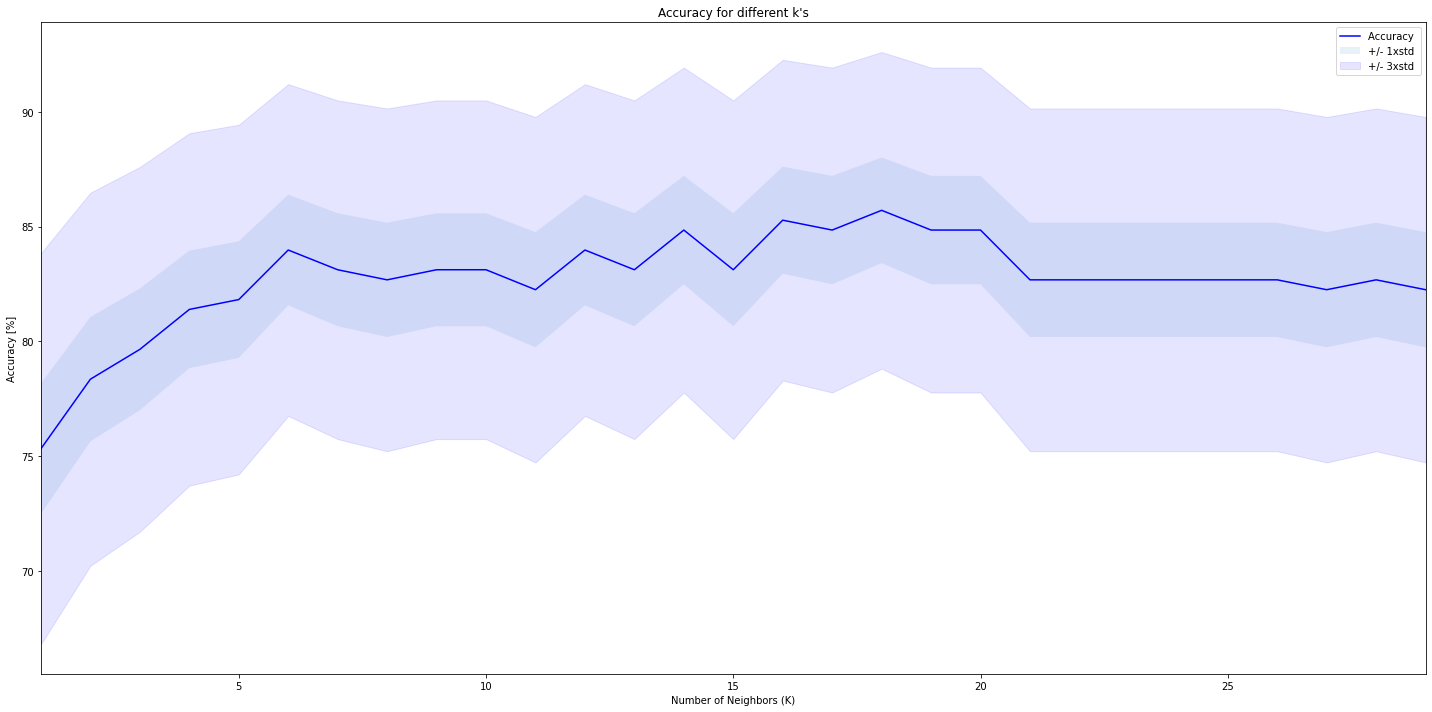

In [47]:
plt.figure(figsize=(20,10))
plt.plot(range(1,Ks),mean_acc,'b')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks), mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10, color="blue")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy [%]')
plt.xlabel('Number of Neighbors (K)')
plt.xlim(1, Ks - 1)
plt.title("Accuracy for different k's")
plt.tight_layout()
plt.show()

In [48]:
print( "The best accuracy was " + str(mean_acc.max()) + "% for k = " + str(mean_acc.argmax() + 1) + ".") 

The best accuracy was 85.71% for k = 18.


# Conclusion

I managed to build a model with accuracy > 80%. The source of the model is k-neighbors algorithm. Best accuracy for test data was for k = 18. 